# KPI's

In [78]:
import pandas as pd

df = pd.read_csv('df.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


## Ventas Totales

In [79]:
total_sales = df['TotalSales'].sum()
total_sales

9747747.933999997

Las ventas totales durante el período en base de datos son $9,747,747.93.

## Ventas promedio por transaccion

In [80]:
avg_sales_per_transaction = df.groupby('InvoiceNo')['TotalSales'].sum().mean()
avg_sales_per_transaction

398.74613163707755

La venta promedio por transacción (cada número de factura única) es de $398.75.

## N° Total de transacciones

In [81]:
total_transactions = df['InvoiceNo'].nunique()
total_transactions

24446

Hay un total de 24,446 transacciones en el dataframe.

## N° Total de Clientes Únicos

In [82]:
total_unique_customers = df['CustomerID'].nunique()
total_unique_customers

4372

Hay un total de 4,372 clientes únicos en el dataframe.

## Ventas Promedio por Cliente

In [83]:
avg_sales_per_customer = df.groupby('CustomerID')['TotalSales'].sum().mean()
avg_sales_per_customer

2229.585529277219

La venta promedio por cliente es de $2,229.59.

## Cantidad Promedio de Productos por Transacción

In [84]:
avg_quantity_per_transaction = df.groupby('InvoiceNo')['Quantity'].sum().mean()
avg_quantity_per_transaction

212.30708500368158

La cantidad promedio de productos por transacción es de aproximadamente 212.31.

## N° Total de Productos Vendidos

In [85]:
total_products_sold = df['Quantity'].sum()
total_products_sold

5190059

Se vendieron un total de 5,190,059 productos.

## Precio Promedio de Venta Por Producto

In [86]:
avg_selling_price_per_product = df['UnitPrice'].mean()
avg_selling_price_per_product

4.623519023785516

El precio promedio de venta por producto es de $4.62.

## Ventas Totales Por País

In [87]:
total_sales_by_country = df.groupby('Country')['TotalSales'].sum()
total_sales_by_country

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

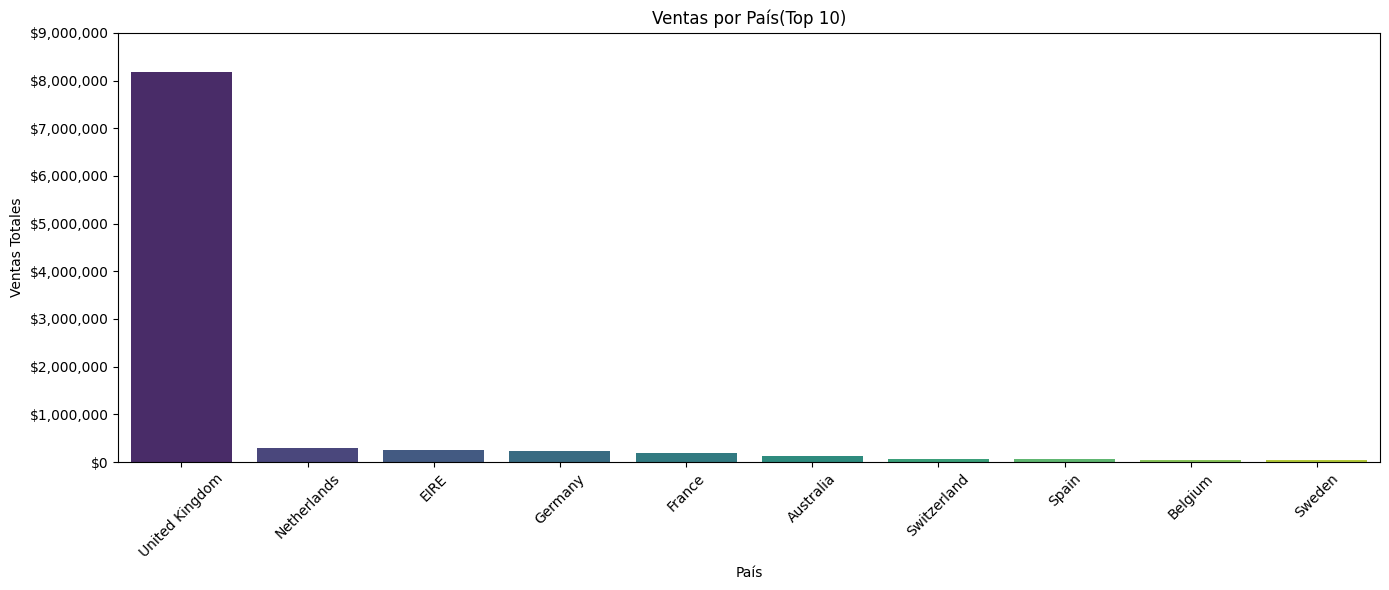

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
top_countries = total_sales_by_country.sort_values(ascending = False).head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Ventas por País(Top 10)')
plt.ylabel('Ventas Totales')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.yticks(ticks=plt.yticks()[0], labels=['${:,.0f}'.format(val) for val in plt.yticks()[0]])
plt.tight_layout()
plt.show()


Las ventas totales por país varían, con el Reino Unido teniendo las ventas más altas de $8,187,806.36.

## Crecimiento Mensual en las Ventas

In [89]:
monthly_sales = df.groupby('InvoiceMonth')['TotalSales'].sum()
monthly_sales_growth = monthly_sales.pct_change() * 100
monthly_sales_growth = (monthly_sales_growth.round(2)).astype(str) + "%"
monthly_sales_growth.to_frame()

,TotalSales
InvoiceMonth,
2010-12,nan%
2011-01,-25.23%
2011-02,-11.06%
2011-03,37.18%
2011-04,-27.82%
2011-05,46.66%
2011-06,-4.45%
2011-07,-1.42%
2011-08,0.2%


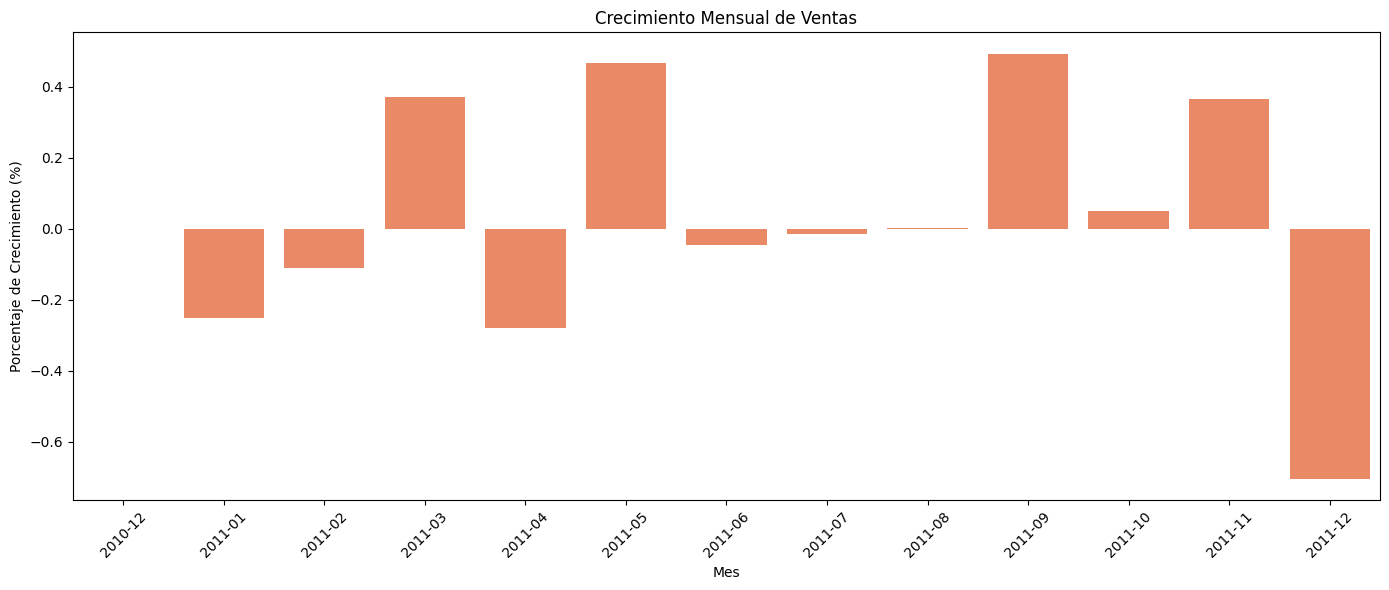

In [90]:
monthly_sales_growth = pd.DataFrame(monthly_sales_growth)

monthly_sales_growth['TotalSales'] = monthly_sales_growth['TotalSales'].str.rstrip('%').astype('float') / 100.0

# Graficar
plt.figure(figsize=(14, 6))
sns.barplot(x=monthly_sales_growth.index, y=monthly_sales_growth['TotalSales'], color='coral')
plt.title('Crecimiento Mensual de Ventas')
plt.ylabel('Porcentaje de Crecimiento (%)')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El crecimiento mensual en ventas muestra fluctuaciones significativas, con algunos meses experimentando un crecimiento positivo y otros una disminución. Por ejemplo, enero de 2011 experimentó una caída del 25.23% en comparación con diciembre de 2010, mientras que mayo de 2011 experimentó un crecimiento del 46.66% en comparación con abril de 2011.

Estos KPI ofrecen una visión detallada del rendimiento del negocio, desde las ventas totales hasta el desglose por país y las tendencias a lo largo del tiempo. Pueden ser útiles para tomar decisiones estratégicas y entender mejor el comportamiento de los clientes.